In [1]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from functions import load_mnist, label_to_word
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""load and shape data"""
# load ONLY TRAIN dataset, to use test: put 't10k' instead of 'train'
mnist = load_mnist('datasets', kind='train')

# generate 30000 random int [between 0 to 60,000]
randomnb = np.random.randint(60000, size=30000)

# data = X (image)
# target = y (label)
# select data and label with random number generated
data = mnist[0][randomnb]
label = mnist[1][randomnb]

# split data by 0.85 (85%) for train and 0.15 (15%) for test
X_train, X_test, y_train, y_test = train_test_split(data, label, train_size=0.85, test_size=0.15)

In [3]:
"""train model
# determinate KNN model with data (1 neighbor)
knn = neighbors.KNeighborsClassifier(1)

# train model with 1 neighbor
model = knn.fit(X_train, y_train)

# get the test data (15%)
predicted = knn.predict(X_test)
"""

'train model'

k=1 -> 89.37777777777778%
k=2 -> 87.37777777777778%
k=3 -> 86.73333333333333%
k=4 -> 86.51111111111112%
k=5 -> 86.22222222222223%
use k=1 with 89.37777777777778%


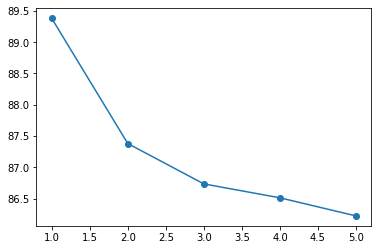

In [4]:
"""train model + optimisation"""
number_of_test = 5

# test wich is good between two neighbors
accuracy_list = []

for k in range(1, (number_of_test+1)):
    # determinate the knn model with 'k' neighbors
    knn = neighbors.KNeighborsClassifier(k)

    # train model with this KNN
    model = knn.fit(X_train, y_train)
    accuracy_score = 100 * model.score(X_test, y_test)

    # append error result
    accuracy_list.append(accuracy_score)
    # print last tested
    print("k={0} -> {1}%".format(k, accuracy_list[-1]))

# so we take the neighbor with minimal pct of errors in errors_list (the best classifier)
optimal_neighbors = (accuracy_list.index(max(accuracy_list))) + 1
print("use k={0} with {1}%".format(optimal_neighbors, accuracy_list[optimal_neighbors-1]))

# save that in a plot
plt.plot(range(1, (number_of_test+1)), accuracy_list, 'o-')
plt.savefig('images/optimal-neighbor.png', dpi=200)

# apply optimal classifier to knn
knn = neighbors.KNeighborsClassifier(optimal_neighbors)
knn.fit(X_train, y_train)

# get the test data (15%)
predicted = knn.predict(X_test)

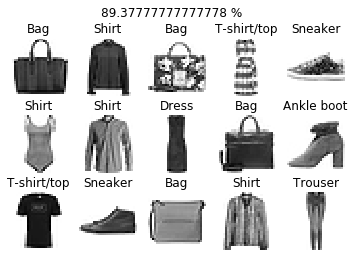

In [5]:
"""prediction"""
# give an image shape to test data
images = X_test.reshape((-1, 28, 28))

# get 10 random image in the predicted data
selection = np.random.randint(images.shape[0], size=15)

# display 5 columns and 5 rows in plot
fig, ax = plt.subplots(3, 5)

# and display score in plot chart
fig.suptitle("{} %".format(accuracy_list[optimal_neighbors-1]))

for index, value in enumerate(selection):
    plt.subplot(3, 5, index+1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation='nearest')
    category = label_to_word(predicted[value])
    plt.title(category)

plt.savefig('images/result.png', dpi=200)